In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [4]:
data_path='Training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

img_size=48
data=[]
label=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            RGB_col=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)           
            resized=cv2.resize(RGB_col,(img_size,img_size))
            data.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            pass

{'female': 0, 'male': 1}
['female', 'male']
[0, 1]


In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)


In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.1)

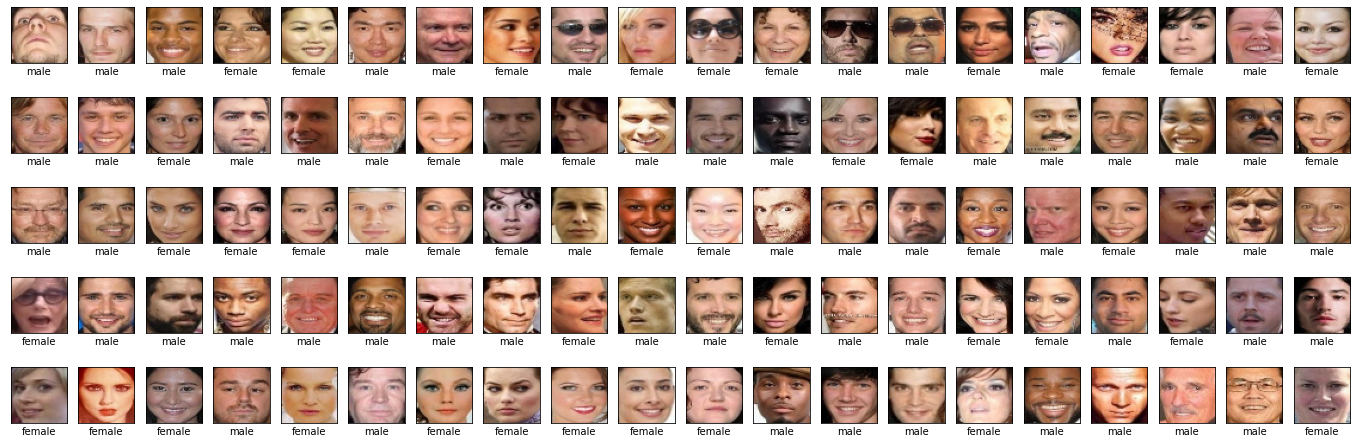

In [18]:
class_names= ['female', 'male']
plt.figure(figsize=(24,8))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(train_data[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel( class_names[train_label[i]])
plt.show()

In [11]:
model = models.Sequential()

model.add( layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=(48,48,3) ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.2) )

model.add( layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.3) )

model.add( layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.4) )

model.add( layers.Flatten())
model.add( layers.Dense(64, kernel_initializer='he_uniform'))
model.add( layers.Activation('relu'))
model.add( layers.BatchNormalization()) 
model.add( layers.Dense(10))
model.add( layers.Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 128)      

In [32]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
h = model.fit(train_data, train_label, epochs=5,validation_split=0.2)

Epoch 1/5
1058/1058 [==============================] - 559s 528ms/step - loss: 1.5773 - accuracy: 0.8910 - val_loss: 1.5201 - val_accuracy: 0.9415
Epoch 2/5
1058/1058 [==============================] - 555s 525ms/step - loss: 1.5314 - accuracy: 0.9299 - val_loss: 1.5229 - val_accuracy: 0.9391
Epoch 3/5
1058/1058 [==============================] - 565s 534ms/step - loss: 1.5244 - accuracy: 0.9366 - val_loss: 1.5093 - val_accuracy: 0.9528
Epoch 4/5
1058/1058 [==============================] - 554s 523ms/step - loss: 1.5169 - accuracy: 0.9452 - val_loss: 1.5089 - val_accuracy: 0.9527
Epoch 5/5
1058/1058 [==============================] - 562s 531ms/step - loss: 1.5153 - accuracy: 0.9465 - val_loss: 1.5058 - val_accuracy: 0.9558


In [20]:
gender_model = Sequential()
name = "Model1"

gender_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=train_data[0].shape))
gender_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
gender_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))


gender_model.add(Flatten())
gender_model.add(Dense(128, activation='relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(7, activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h1= gender_model.fit(train_data, train_label, epochs=100,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/100
1058/1058 [==============================] - 160s 147ms/step - loss: 0.3976 - accuracy: 0.8203 - val_loss: 0.1807 - val_accuracy: 0.9296
Epoch 2/100
1058/1058 [==============================] - 116s 109ms/step - loss: 0.1845 - accuracy: 0.9289 - val_loss: 0.1424 - val_accuracy: 0.9442
Epoch 3/100
1058/1058 [==============================] - 118s 112ms/step - loss: 0.1520 - accuracy: 0.9447 - val_loss: 0.1350 - val_accuracy: 0.9479
Epoch 4/100
1058/1058 [==============================] - 122s 115ms/step - loss: 0.1323 - accuracy: 0.9532 - val_loss: 0.1467 - val_accuracy: 0.9416
Epoch 5/100
1058/1058 [==============================] - 121s 114ms/step - loss: 0.1179 - accuracy: 0.9576 - val_loss: 0.1342 - val_accuracy: 0.9494
Epoch 6/100
1058/1058 [==============================] - 142s 134ms/step - loss: 0.1054 - accuracy: 0.9620 - val_loss: 0.1254 - val_accuracy: 0.9554
Epoch 7/100
1058/1058 [==============================] - 134s 127ms/step - loss: 0.0935 - accuracy: 0.9674

In [15]:
gender_model = Sequential()
name="Model2"

gender_model.add(Conv2D(8, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', input_shape=train_data[0].shape))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.3))

gender_model.add(Conv2D(16, kernel_size=(3, 3),kernel_initializer='he_uniform', padding='same'))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))
                 


gender_model.add(Flatten())
gender_model.add(Dense(32,kernel_initializer='he_uniform'))
gender_model.add(Activation('relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(7))
gender_model.add(Activation('softmax'))
                 

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h2=gender_model.fit(train_data, train_label, epochs=50,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/50
1058/1058 [==============================] - 70s 61ms/step - loss: 0.8451 - accuracy: 0.6027 - val_loss: 0.3481 - val_accuracy: 0.8673
Epoch 2/50
1058/1058 [==============================] - 29s 28ms/step - loss: 0.4557 - accuracy: 0.7864 - val_loss: 0.2715 - val_accuracy: 0.9062
Epoch 3/50
1058/1058 [==============================] - 30s 28ms/step - loss: 0.3884 - accuracy: 0.8315 - val_loss: 0.2141 - val_accuracy: 0.9207
Epoch 4/50
1058/1058 [==============================] - 31s 29ms/step - loss: 0.3435 - accuracy: 0.8567 - val_loss: 0.2106 - val_accuracy: 0.9235
Epoch 5/50
1058/1058 [==============================] - 32s 30ms/step - loss: 0.3202 - accuracy: 0.8687 - val_loss: 0.2214 - val_accuracy: 0.9169
Epoch 6/50
1058/1058 [==============================] - 33s 31ms/step - loss: 0.2909 - accuracy: 0.8816 - val_loss: 0.2041 - val_accuracy: 0.9241
Epoch 7/50
1058/1058 [==============================] - 33s 31ms/step - loss: 0.2800 - accuracy: 0.8855 - val_loss: 0.1900 -

In [7]:
gender_model = models.Sequential()
name="Model3"

gender_model.add( layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=train_data[0].shape ))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.2) )

gender_model.add( layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same' ))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.3) )

gender_model.add( layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same' ))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.4) )

gender_model.add( layers.Flatten())
gender_model.add( layers.Dense(64, kernel_initializer='he_uniform'))
gender_model.add( layers.Activation('relu'))
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.Dense(10))
gender_model.add( layers.Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h3=gender_model.fit(train_data, train_label, epochs=50,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/50
1058/1058 [==============================] - 424s 398ms/step - loss: 0.5983 - accuracy: 0.8486 - val_loss: 0.1983 - val_accuracy: 0.9377
Epoch 2/50
1058/1058 [==============================] - 448s 424ms/step - loss: 0.1536 - accuracy: 0.9443 - val_loss: 0.1477 - val_accuracy: 0.9475
Epoch 3/50
1058/1058 [==============================] - 462s 437ms/step - loss: 0.1445 - accuracy: 0.9467 - val_loss: 0.1353 - val_accuracy: 0.9498
Epoch 4/50
1058/1058 [==============================] - 470s 445ms/step - loss: 0.1358 - accuracy: 0.9506 - val_loss: 0.2436 - val_accuracy: 0.9388
Epoch 5/50
1058/1058 [==============================] - 466s 441ms/step - loss: 0.1148 - accuracy: 0.9583 - val_loss: 0.1713 - val_accuracy: 0.9349
Epoch 6/50
1058/1058 [==============================] - 473s 447ms/step - loss: 0.1048 - accuracy: 0.9631 - val_loss: 0.1336 - val_accuracy: 0.9540
Epoch 7/50
1058/1058 [==============================] - 463s 437ms/step - loss: 0.1014 - accuracy: 0.9643 - val_

In [8]:
gender_model = models.Sequential()
name="Model4"

gender_model.add( layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=train_data[0].shape))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.25) )

gender_model.add( layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same' ))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.1) )

gender_model.add( layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same' ))
gender_model.add( layers.Activation('relu') )
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.MaxPooling2D((2,2)) )
gender_model.add( layers.Dropout(0.3) )

gender_model.add( layers.Flatten())
gender_model.add( layers.Dense(32, kernel_initializer='he_uniform'))
gender_model.add( layers.Activation('relu'))
gender_model.add( layers.BatchNormalization()) 
gender_model.add( layers.Dense(10))
gender_model.add( layers.Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h4=gender_model.fit(train_data, train_label, epochs=50,validation_split=0.25,callbacks=[tensorboard])

Epoch 1/50
992/992 [==============================] - 427s 427ms/step - loss: 0.6166 - accuracy: 0.8625 - val_loss: 0.2418 - val_accuracy: 0.9257
Epoch 2/50
992/992 [==============================] - 522s 526ms/step - loss: 0.1467 - accuracy: 0.9468 - val_loss: 0.1240 - val_accuracy: 0.9576
Epoch 3/50
992/992 [==============================] - 440s 444ms/step - loss: 0.1258 - accuracy: 0.9536 - val_loss: 0.1090 - val_accuracy: 0.9620
Epoch 4/50
992/992 [==============================] - 447s 451ms/step - loss: 0.1081 - accuracy: 0.9626 - val_loss: 0.1181 - val_accuracy: 0.9578
Epoch 5/50
992/992 [==============================] - 446s 449ms/step - loss: 0.1073 - accuracy: 0.9611 - val_loss: 0.1093 - val_accuracy: 0.9601
Epoch 6/50
992/992 [==============================] - 443s 447ms/step - loss: 0.0999 - accuracy: 0.9639 - val_loss: 0.1582 - val_accuracy: 0.9465
Epoch 7/50
992/992 [==============================] - 1116s 1s/step - loss: 0.0899 - accuracy: 0.9687 - val_loss: 0.1442 - v

In [16]:
gender_model = Sequential()
name="Model5"

gender_model.add(Conv2D(16, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', input_shape=train_data[0].shape))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))

gender_model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='he_uniform', padding='same'))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))
                 


gender_model.add(Flatten())
gender_model.add(Dense(32,kernel_initializer='he_uniform'))
gender_model.add(Activation('relu'))
gender_model.add(Dropout(0.4))
gender_model.add(Dense(9))
gender_model.add(Activation('softmax'))
                 

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h5=gender_model.fit(train_data, train_label, epochs=80,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/80
1058/1058 [==============================] - 86s 80ms/step - loss: 0.7716 - accuracy: 0.6619 - val_loss: 0.2523 - val_accuracy: 0.9110
Epoch 2/80
1058/1058 [==============================] - 45s 42ms/step - loss: 0.3717 - accuracy: 0.8449 - val_loss: 0.2114 - val_accuracy: 0.9242
Epoch 3/80
1058/1058 [==============================] - 48s 45ms/step - loss: 0.3061 - accuracy: 0.8739 - val_loss: 0.1738 - val_accuracy: 0.9359
Epoch 4/80
1058/1058 [==============================] - 49s 46ms/step - loss: 0.2749 - accuracy: 0.8867 - val_loss: 0.1685 - val_accuracy: 0.9368
Epoch 5/80
1058/1058 [==============================] - 50s 47ms/step - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.1512 - val_accuracy: 0.9434
Epoch 6/80
1058/1058 [==============================] - 53s 50ms/step - loss: 0.2356 - accuracy: 0.9017 - val_loss: 0.1525 - val_accuracy: 0.9437
Epoch 7/80
1058/1058 [==============================] - 53s 50ms/step - loss: 0.2171 - accuracy: 0.9066 - val_loss: 0.1491 -

Epoch 57/80
1058/1058 [==============================] - 51s 48ms/step - loss: 0.1580 - accuracy: 0.9240 - val_loss: 0.1232 - val_accuracy: 0.9566
Epoch 58/80
1058/1058 [==============================] - 50s 48ms/step - loss: 0.1539 - accuracy: 0.9267 - val_loss: 0.1212 - val_accuracy: 0.9559
Epoch 59/80
1058/1058 [==============================] - 56s 53ms/step - loss: 0.1494 - accuracy: 0.9247 - val_loss: 0.1418 - val_accuracy: 0.9424
Epoch 60/80
1058/1058 [==============================] - 61s 58ms/step - loss: 0.1617 - accuracy: 0.9237 - val_loss: 0.1234 - val_accuracy: 0.9554
Epoch 61/80
1058/1058 [==============================] - 52s 50ms/step - loss: 0.1529 - accuracy: 0.9292 - val_loss: 0.1221 - val_accuracy: 0.9556
Epoch 62/80
1058/1058 [==============================] - 52s 49ms/step - loss: 0.1452 - accuracy: 0.9291 - val_loss: 0.1234 - val_accuracy: 0.9567
Epoch 63/80
1058/1058 [==============================] - 53s 50ms/step - loss: 0.1521 - accuracy: 0.9285 - val_loss: 0

In [6]:
gender_model = Sequential()
name="Model6"

gender_model.add(Conv2D(16, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', input_shape=train_data[0].shape))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.25))

gender_model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='he_uniform', padding='same'))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.3))

gender_model.add(Conv2D(64, kernel_size=(3, 3),kernel_initializer='he_uniform', padding='same'))
gender_model.add(Activation('relu') )
gender_model.add(MaxPooling2D(pool_size=(2, 2)))
gender_model.add(Dropout(0.4))
         

gender_model.add(Flatten())
gender_model.add(Dense(64,kernel_initializer='he_uniform'))
gender_model.add(Activation('relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(12))
gender_model.add(Activation('softmax'))
                 

tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
gender_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h6=gender_model.fit(train_data, train_label, epochs=80,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/80
1058/1058 [==============================] - 92s 61ms/step - loss: 0.6965 - accuracy: 0.6194 - val_loss: 0.2573 - val_accuracy: 0.9196
Epoch 2/80
1058/1058 [==============================] - 63s 60ms/step - loss: 0.3092 - accuracy: 0.8791 - val_loss: 0.1709 - val_accuracy: 0.9420
Epoch 3/80
1058/1058 [==============================] - 63s 59ms/step - loss: 0.2342 - accuracy: 0.9139 - val_loss: 0.1503 - val_accuracy: 0.9450
Epoch 4/80
1058/1058 [==============================] - 69s 65ms/step - loss: 0.2134 - accuracy: 0.9224 - val_loss: 0.1476 - val_accuracy: 0.9445
Epoch 5/80
1058/1058 [==============================] - 66s 63ms/step - loss: 0.2091 - accuracy: 0.9244 - val_loss: 0.1309 - val_accuracy: 0.9510
Epoch 6/80
1058/1058 [==============================] - 66s 62ms/step - loss: 0.1962 - accuracy: 0.9283 - val_loss: 0.1319 - val_accuracy: 0.9526
Epoch 7/80
1058/1058 [==============================] - 63s 60ms/step - loss: 0.1803 - accuracy: 0.9365 - val_loss: 0.1279 -

In [9]:
gender_model.save("model-gender")

INFO:tensorflow:Assets written to: model-gender\assets


In [6]:
%reload_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir logs

